<a href="https://colab.research.google.com/github/Prasenjit10/OTT-Audience-Map-for-SNU-Film-Fest/blob/main/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load the data ....
import pandas as pd
df = pd.read_csv('/content/Data Collection for ML mini project (Responses) - Form Responses 1.csv')
# Print first 5 rows ....
df.head()

,Timestamp,Age,"Height\nRange should be between 120 cm - 220 cm\nNote(Provide the height in integer for eg-124cm ,\n don't provide like 120.64)",Weight\nRange should be between 30 - 150 kg,Cuisine_top1,Cuisine_top2,Cuisine_top3,Spice Tolerance,Dietary Preference,Eating Out Per week,...,Hobby_top1,Hobby top2,Club top1,Club top 2,Weekly_hobby_hours \nprovide values integer between between 0-40,Introversion extraversion,Risk taking,Conscientiousness,Open to new experiences,"Teamwork preference \n Like: ( 1=Prefer Solo, 5=Prefer Teams)"
0,8/27/2025 11:13:12,Age-21,120,30,Mughlai,Bengali,Japanese,2,Jain,7,...,Cricket,Writing,Robotics Club,Music Club,0,2,2,2,2,3
1,8/27/2025 13:19:21,Age-19,167,50,Indian,Mexican,Street Food,5,Non-Veg,7,...,Coding,Cricket,Coding Club,Sports Club,40,3,2,3,5,3
2,8/27/2025 13:20:10,Age-20,167,60,Bengali,Mughlai,Italian,5,Non-Veg,3,...,Cricket,Coding,Coding Club,Sports Club,5,3,4,3,4,3
3,8/27/2025 13:21:56,Age-22,170,53,Indian,Chinese,Street Food,4,Non-Veg,7,...,Cricket,Music,Entrepreneurship Cell,Sports Club,10,5,5,5,5,5
4,8/27/2025 13:23:18,Age-21,167 cm,80 kg,Indian,Mughlai,Chinese,3,Non-Veg,4,...,Badminton,Debate,Literary Club,Entrepreneurship Cell,5,3,5,4,4,1


In [ ]:
# Removing extra spaces from the columns name
df.columns = df.columns.str.strip()
df.columns

Index(['Timestamp', 'Age',
       'Height\nRange should be between 120 cm - 220 cm\nNote(Provide the height in integer for eg-124cm ,\n           don't provide like 120.64)',
       'Weight\nRange should be between 30 - 150 kg', 'Cuisine_top1',
       'Cuisine_top2', 'Cuisine_top3', 'Spice Tolerance', 'Dietary Preference',
       'Eating Out Per week',
       'Food Budget per meal Note: Provide integer value for eg like-199',
       'Sweet tooth level (1 is low and 5 is high)', 'Tea vs Coffee',
       'Movie_genre_top1', 'Movie_genre_top2', 'Movie_genre_top3',
       'Series_genre_top1', 'Series_genre_top2', 'Series_genre_top3',
       'Content_lang_top1', 'Content_lang_top2', 'Content_lang_top3',
       'Ott Top1', 'Ott Top2', 'Ott Top3', 'Binge frequency per week',
       'Screen Time Movies/series in hours per week  \n(Provide value between 0-40)',
       'Gaming days per week',
       'Gaming hours per week  \n(Provide Values in integer between 0-50)',
       'Game Genre Top1', 'Ga

In [ ]:
# Coping the features columns and creating a new data set named df_final
Features = ['Movie_genre_top1', 'Series_genre_top1', 'Ott Top1', 'Content_lang_top1']
df_final = df[Features].copy()

In [ ]:
# Removing the extra spaces in the values
df_final  = df_final.apply(lambda x: x.str.strip())

In [ ]:
# Removing rows containing null values
df_final.dropna(inplace=True)
df_final.isnull().sum()

,0
Movie_genre_top1,0
Series_genre_top1,0
Ott Top1,0
Content_lang_top1,0


In [ ]:
# Encoding categorical features
from sklearn.preprocessing import LabelEncoder
lebel_encoder = LabelEncoder()
df_encoded = df_final.apply(lebel_encoder.fit_transform)

In [ ]:
# printing the dataset before encoding
df_final.head()

,Movie_genre_top1,Series_genre_top1,Ott Top1,Content_lang_top1
0,Horror,Historical,JioCinema,Kannada
1,Scie-fi,Crime,Netflix,Others
2,Drama,Fantasy,Netflix,English
3,Scie-fi,Historical,YouTube,Hindi
4,Action,Crime,Netflix,Hindi


In [ ]:
# printing the dataset after encoding
df_encoded.head()

,Movie_genre_top1,Series_genre_top1,Ott Top1,Content_lang_top1
0,5,3,1,3
1,7,1,2,4
2,4,2,2,1
3,7,3,4,2
4,0,1,2,2


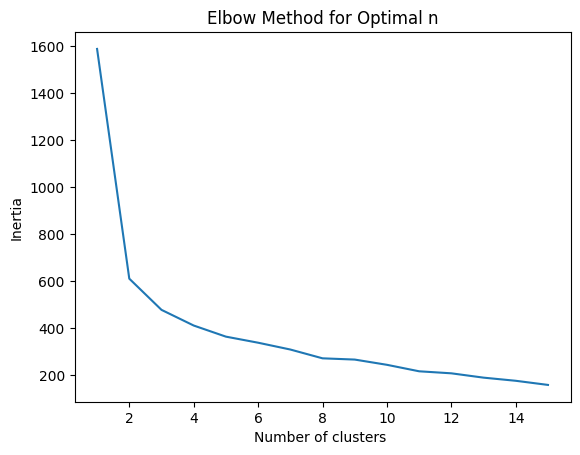

In [ ]:
# Determine optimal number of clusters (Elbow Method)
from sklearn.cluster import KMeans
ks = []
inertia = []
for n in range(1,16):
    kmeans = KMeans(n_clusters=n)
    ks.append(n)
    kmeans.fit(df_encoded)
    inertia.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(ks, inertia)
plt.xlabel('Number of clusters ')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal n')
plt.show()

In [ ]:
# Apply kmeans clustering algorithm
kmeans = KMeans(n_clusters=4)
df_final['Cluster'] = kmeans.fit_predict(df_encoded)

In [ ]:
# Checking the silhouette_score of the model
from sklearn.metrics import silhouette_score

labels = kmeans.labels_
sil_score = silhouette_score(df_encoded, labels)
print("Silhouette Score:", sil_score)

Silhouette Score: 0.30298468673925605


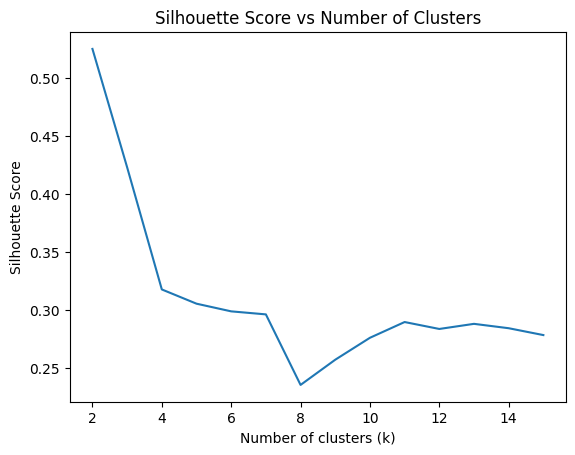

In [ ]:
# Determine number of clusters have best silhouette score
ks = []
sil_scores = []

for n in range(2, 16):  # start from 2, silhouette score is not defined for k=1
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(df_encoded)
    labels = kmeans.labels_

    # Calculate silhouette score
    score = silhouette_score(df_encoded, labels)
    ks.append(n)
    sil_scores.append(score)

# Plotting silhouette scores
plt.plot(ks, sil_scores)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.show()


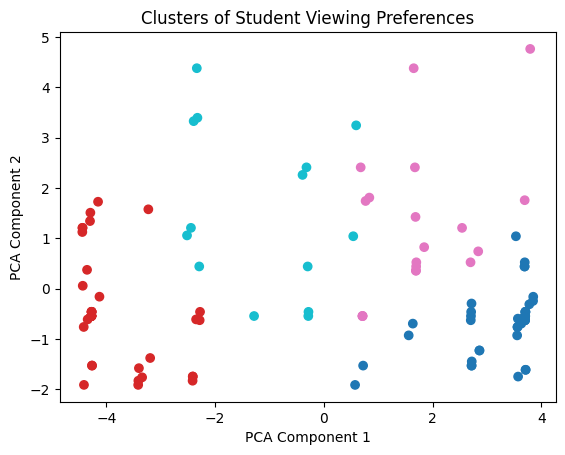

In [ ]:
# visualization of clusters in 2D space
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced = pca.fit_transform(df_encoded)
plt.scatter(reduced[:, 0], reduced[:, 1], c=df_final['Cluster'], cmap='tab10')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clusters of Student Viewing Preferences')
plt.show()


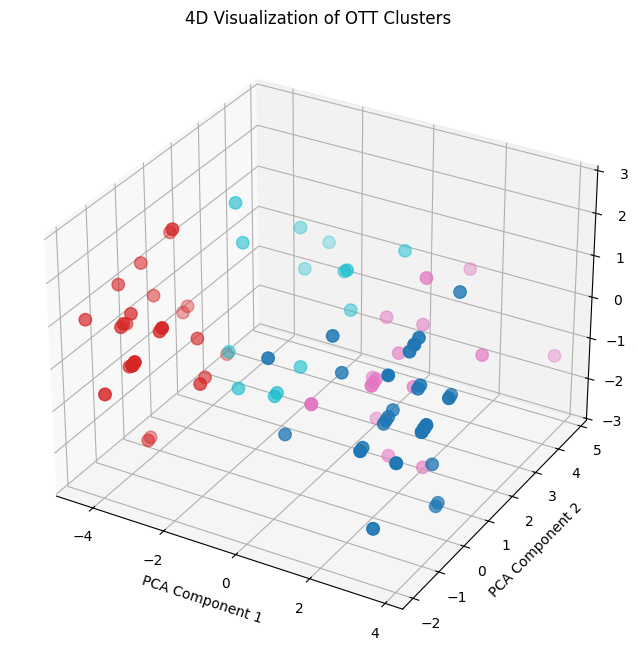

In [ ]:
# visualization of clusters in 3D space
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

# Reduce encoded data to 3 dimensions for 3D plotting
pca = PCA(n_components=3)
reduced = pca.fit_transform(df_encoded)  # df_encoded = encoded columns you used for clustering

# Fourth dimension = cluster labels
clusters = df_final['Cluster']

# Create a 3D scatter plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with color for clusters
scatter = ax.scatter(
    reduced[:, 0],  # X-axis
    reduced[:, 1],  # Y-axis
    reduced[:, 2],  # Z-axis
    c=clusters,     # Color represents cluster
    cmap='tab10',   # Color map for clusters
    s=80            # Point size
)

# Add axis labels
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
plt.title('4D Visualization of OTT Clusters')

# Add colorbar for cluster mapping
plt.show()


In [ ]:
df_final.head()

,Movie_genre_top1,Series_genre_top1,Ott Top1,Content_lang_top1,Cluster
0,Horror,Historical,JioCinema,Kannada,2
1,Scie-fi,Crime,Netflix,Others,0
2,Drama,Fantasy,Netflix,English,3
3,Scie-fi,Historical,YouTube,Hindi,2
4,Action,Crime,Netflix,Hindi,1
